In [4]:
import pandas as pd 
import numpy as np 
import tensorly as tl
import plotly.express as px
import matplotlib.pyplot as plt 
from tensorly.decomposition import CP,tucker, parafac, non_negative_tucker
from datetime import timedelta, date
from statsmodels.tsa.stattools import acf, pacf

In [5]:
df_FR = pd.read_excel('FINANCIAL_RATIOS_NEW.xlsx', index_col =[0], skiprows=[1])



In [117]:
price = None
FR_dic = {}
FR_list = ['PE', 'PX_LAST', 'PS','PB']
n = 0 
NUMBER_OF_STOCKS = 220

log_returns = None 

COLUMN_NAMES = None
for i,name in enumerate(FR_list) : 
    FR_dic[name] = (df_FR.iloc[:,n:n+NUMBER_OF_STOCKS]
                    .set_index(df_FR.index)
                    )
    if i == 0 : 
        COLUMN_NAMES = FR_dic['PE'].columns

    FR_dic[name].columns = COLUMN_NAMES  
    
    if name in ['PX_LAST'] :
        price = FR_dic['PX_LAST']
        log_returns = np.log(price)
        log_returns = FR_dic[name].diff()
        print(log_returns)
        pass


    FR_dic[name] = FR_dic[name][1:]
    n += NUMBER_OF_STOCKS + 2

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    FR_dic['PE'].replace([np.inf, -np.inf], np.nan, inplace=True)
    FR_dic['PB'].replace([np.inf, -np.inf], np.nan, inplace=True)
    FR_dic['PS'].replace([np.inf, -np.inf], np.nan, inplace=True)

    drop_column_names = FR_dic['PE'].columns[FR_dic['PE'].isna().any()]
    drop_column_names_2 = FR_dic['PS'].columns[FR_dic['PS'].isna().any()]
    drop_column_names_3 = FR_dic['PB'].columns[FR_dic['PB'].isna().any()]
    remain_column_names = FR_dic['PE'].columns[~FR_dic['PE'].isna().any()]


for i,name in enumerate(FR_list) : 
    FR_dic[name] = FR_dic[name].drop(drop_column_names, axis=1)
    FR_dic[name] = FR_dic[name].drop(drop_column_names_2, axis=1, errors='ignore')
    FR_dic[name] = FR_dic[name].drop(drop_column_names_3, axis=1, errors='ignore')

# Windsoring of data
# for i,name in enumerate(FR_list) : 
    df = FR_dic[name]
    # if name in ['PE'] : 
    # print(FR_dic[name].iloc[0].describe()) if name == 'PE' else None 
    FR_dic[name] = df.clip(upper=df.quantile(0.90), axis=1)
    # print(FR_dic[name].iloc[0].describe()) if name == 'PE' else None 


final_column_names = FR_dic['PE'].columns
# for i,name in enumerate(FR_list) : 

#         print(name)
#         FR_dic[name].replace([np.inf, -np.inf], np.nan, inplace=True)
#         drop_column_names = FR_dic[name].columns[FR_dic[name].isna().any()]
#         remain_column_names = FR_dic[name].columns[~FR_dic[name].isna().any()]
#         print(drop_column_names)
FR_index = FR_dic['PE'].index
log_returns = log_returns[1:]


FR_index

            AMAT US Equity  COKE US Equity  WDFC US Equity  AAPL US Equity  \
2006-11-10             NaN             NaN             NaN             NaN   
2006-11-17            0.50            4.19           -0.38           0.097   
2006-11-24            0.40           -0.39            0.05           0.207   
2006-12-01           -0.79           -2.54           -0.37          -0.012   
2006-12-08            0.74            4.73            0.83          -0.109   
...                    ...             ...             ...             ...   
2022-04-29           -2.45          -33.30           -7.73          -4.140   
2022-05-06            2.15           42.15           -1.95          -0.370   
2022-05-13           -0.64           47.15            3.67         -10.170   
2022-05-20           -5.40          -22.39           -9.43          -9.520   
2022-05-27           13.02           56.91           10.61          12.050   

            KLAC US Equity  SEIC US Equity  CSPI US Equity  ALO

DatetimeIndex(['2006-11-17', '2006-11-24', '2006-12-01', '2006-12-08',
               '2006-12-15', '2006-12-22', '2006-12-29', '2007-01-05',
               '2007-01-12', '2007-01-19',
               ...
               '2022-03-25', '2022-04-01', '2022-04-08', '2022-04-15',
               '2022-04-22', '2022-04-29', '2022-05-06', '2022-05-13',
               '2022-05-20', '2022-05-27'],
              dtype='datetime64[ns]', length=811, freq=None)

### Read the technical indicators into the dataframe.

In [118]:
df_TI = pd.read_excel('TECH_NEW.xlsx', skiprows=[0])

TI_dic = {}
TI_list = ['BB_PERCENT', 'HURST', 'MOM', 'ROC','RSI','WLPR']
n = 1

for _, TI in enumerate(TI_list) : 
    filter_col = [col for col in df_TI if col.startswith(TI)]
    TI_dic[TI] = (df_TI[filter_col] 
                 .set_axis(COLUMN_NAMES, axis=1)
                 .set_index(df_TI['Dates'])
                 .iloc[:-1]
                 .fillna(method = 'ffill')
                 .set_index(FR_index)
                 )
    print(TI_dic[TI])
    

TI_dic.pop('WLPR', None)
TI_dic.pop('BB_PERCENT', None)
TI_dic.pop('RSI', None)
print()








            AMAT US Equity  COKE US Equity  WDFC US Equity  AAPL US Equity  \
2006-11-17        0.920725        0.790533        0.299094        0.889780   
2006-11-24        0.823815        0.767193        0.260161        0.995344   
2006-12-01        0.745419        0.718539        0.309934        0.991250   
2006-12-08        0.806834        0.853188        0.324167        0.914653   
2006-12-15        0.648235        0.911753        0.327228        0.854121   
...                    ...             ...             ...             ...   
2022-04-29        0.013064        0.165564        0.232073        0.023449   
2022-05-06        0.216839        0.338704        0.215706        0.379180   
2022-05-13        0.029507        0.366630        0.173864       -0.151802   
2022-05-20        0.174819        0.341748        0.192042       -0.150375   
2022-05-27        0.157177        0.846584        0.282257       -0.044283   

            KLAC US Equity  SEIC US Equity  CSPI US Equity  ALO

In [119]:
# log_returns

In [120]:
# ax = TI_dic['MOM'].plot(legend=False)
# plt.figure()
# ax = TI_dic['ROC'].plot(legend=False)
# plt.figure()



# ax= (FR_dic['PE'].iloc[0]).plot(legend=False)
# plt.figure()
# ax= (FR_dic['PE'].iloc[:,:40]).plot(legend=False)




# plt.figure()
# ax= (FR_dic['PS']).plot(legend=False)
# plt.figure()
# ax= (FR_dic['PB'].iloc[0]).plot(legend=False)



In [121]:
for _,TI in enumerate(TI_list) : 
    if TI not in ['BB_PERCENT','WLPR', 'RSI'] :
        TI_dic[TI] = TI_dic[TI][final_column_names]


# for _,name in enumerate(FR_list) : 
 

In [122]:
# for i,TI in enumerate(TI_list) : 
#     if TI not in ['BB_PERCENT','WLPR', 'RSI'] :
#         TI_dic[TI].replace([np.inf, -np.inf], np.nan, inplace=True)
#         drop_column_names = TI_dic[TI].columns[TI_dic[TI].isna().any()]
#         remain_column_names = TI_dic[TI].columns[~TI_dic[TI].isna().any()]
#         print(drop_column_names)
#         print(TI_dic[TI].shape)

In [123]:
date_min = FR_index[200]
date_max = FR_index[-1]

date_min

Timestamp('2010-09-17 00:00:00')

In [124]:
look_back_duration = 1
look_forward = 1
n_stocks = 12
n_features = 7
    

From the figure above, the reconstruction error decreases drastically initially once the rank increases above 13, the error no longer drastically anymore. We will hence select a rank of [700,18,6]

In [194]:
ft1 =  np.stack(FR_dic.values(), axis=2)
ft2 = np.stack(TI_dic.values(), axis=2)


feature_tensor = np.dstack((ft1, ft2))

# total_pc = np.zeros(shape=[2,n_stocks,n_features])
# list_of_features = [] #Split the features into different look_back_duration time slots. 

# for k in range(0,len(feature_tensor),look_back_duration): 
#     core, factors = tucker(feature_tensor[k:k+look_back_duration], rank= [2,n_stocks,n_features])
#     print(core.shape)
#     pc = tl.tenalg.mode_dot(feature_tensor[k:k+look_back_duration], factors[1].T, mode = 1)
#     print(pc.shape)
#     # print(total_pc.shape)
#     total_pc = np.vstack((total_pc,pc))
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_tensor[k:k+look_back_duration])/tl.norm(feature_tensor[k:k+look_back_duration])
#     print(rec_error)
# total_pc = total_pc[2:]


# feature_tensor = np.dstack((ft1, ft2))

def tuck_decomp(ft, t , s , f) : 

    core, factors = tucker(ft, rank= [t,s,f]) # 811 time, 20 stocks, 7 
    pc = tl.tenalg.mode_dot(ft, factors[1].T, mode = 1)
    stock_loadings = factors[1]
    rec = tl.tucker_to_tensor((core,factors))
    rec_error = tl.norm(rec - ft)/tl.norm(ft)
    print(rec_error)
    print(pc.shape)
    return pc, stock_loadings 


loading_len = 200
feature_loading_tensor, feature_tensorz = feature_tensor[loading_len:], feature_tensor[loading_len:]

pc_tmp, stock_loadings = tuck_decomp(feature_loading_tensor, len(feature_loading_tensor), n_stocks, n_features)

total_pc = tl.tenalg.mode_dot(feature_tensorz, stock_loadings.T, mode=1) #Principal components based on loadings on the first 180 !!


# rec = tl.tucker_to_tensor((core,factors))
# rec_error = tl.norm(rec - ft)/tl.norm(ft)
# print(rec_error)


c:\Users\zackx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


0.1404220201751065
(611, 12, 7)


In [195]:
# # import sys
# # import numpy as np 
# # np.set_printoptions(threshold=sys.maxsize)

# # ft1 =  np.stack(FR_dic.values(), axis=2)
# # ft2 = np.stack(TI_dic.values(), axis=2)
# # feature_tensor = np.dstack((ft1, ft2))

# error_list = []
# for n in np.arange(1,150,2) : 
#     core, factors = tucker(feature_loading_tensor, rank= [200,n,6])
#     pc = tl.tenalg.mode_dot(feature_loading_tensor, factors[1].T, mode = 1)
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_loading_tensor)/tl.norm(feature_loading_tensor)
#     error_list.append(rec_error)
# fig, ax = plt.subplots(1)
# ax.plot(np.arange(1,150,2), error_list)
# ax.scatter(np.arange(1,150,2), error_list)
# ax.grid('On')
# ax.set_title("Reconstruction error against number of companies")
# ax.set_xlabel("Rank")
# ax.set_ylabel("Reconstruction error")
# fig.set_size_inches(10,7)
# fig.tight_layout()
# fig.savefig('Reconstruction error')

# arr = stock_loadings[:,0]



# T1 = [final_column_names[i] for i in np.argwhere( abs(arr) > 0.01)]

# # T1


# arr = stock_loadings[:,3]



# T2 = [final_column_names[i] for i in np.argwhere( (arr) > 0.09)]



T2

# arr = stock_loadings[:,8]



# T3 = [final_column_names[i] for i in np.argwhere( arr > 0.05)]


# T3

# print(T2)


# T3



[Index(['AMAT US Equity'], dtype='object'),
 Index(['AMWD US Equity'], dtype='object'),
 Index(['CGNX US Equity'], dtype='object'),
 Index(['ROCK US Equity'], dtype='object'),
 Index(['SGMA US Equity'], dtype='object'),
 Index(['CLWT US Equity'], dtype='object')]

In [196]:
# title_names = ['PE','Price', 'PS', 'PB', 'HURST', 'ROC7', 'ROC1']
# # 0, 3 ,
# for i in range(n_features) : 
#     fig, ax = plt.subplots(1)
#     # for n in range(n_stocks) :
#     ax.plot(FR_index[200:],total_pc[:,0,i])
#     ax.set_xlim(date_min, date_max)
#     ax.set_ylabel(f"{title_names[i]}")
#     ax.set_xlabel(f"Time")
#     ax.set_title(f"{title_names[i]} against Time")
#     ax.grid(True)

#     fig.set_size_inches(7,5)
#     fig.tight_layout()
#     # fig.savefig(f'2-{title_names[i]}')  

In [197]:
# import yfinance as yf
# import datetime
# import time
# import requests
# import io

# # print(FR_index[200:])
# # print(start)
# start = date_min
# end = date_max
# spy_ohlc_df = yf.download('SPY', start=FR_index[201], end=end, interval = '1wk')
# # print(spy_ohlc_df)
# # title_names = ['PE','Price', 'PS', 'PB', 'HURST', 'ROC7', 'ROC1']
# # for i in range(n_features) : 
# fig, ax = plt.subplots(1)
# # # for n in range(n_stocks) :
# ax.plot(spy_ohlc_df['Open'])
# ax.set_xlim(date_min, date_max)
# ax.set_ylabel(f"{title_names[i]}")
# ax.set_xlabel(f"Time")
# ax.set_title(f"S&P 500 price against Time")
# ax.grid(True)

# fig.set_size_inches(7,5)
# fig.tight_layout()
# fig.savefig(f'S&P 500')  



In [198]:
def get_normalized_pc(total_pc,log_returns) : 
    normalized_pc = np.ones(total_pc.shape)
    for i in range(n_features) : 

        tmp = pd.DataFrame(total_pc[:,:,i])
        print( (tmp - tmp.rolling(window=20,min_periods=1).mean()) / tmp.rolling(window=20,min_periods=1).std())
        if i in  [1] : 
            tmp = (tmp - tmp.rolling(window=20,min_periods=1).mean()) / tmp.rolling(window=20,min_periods=1).std()
        if i not in [1] : 
            tmp = (tmp - tmp.rolling(window=20,min_periods=1).mean()) / tmp.rolling(window=20,min_periods=1).std()
        normalized_pc[:,:,i] = tmp
        #24-11
    return normalized_pc[1:], log_returns[1:]




normalized_pc,log_ret = get_normalized_pc(total_pc,log_returns)

# total_pc = (total_rolling_pc[1:])
# print(total_pc.shape)
# log_returns = log_returns[1:]
list_of_features = [] #Split the features into different look_back_duration time slots. 
for i in range(0,len(normalized_pc)-look_back_duration-look_forward+1) : 
    list_of_features.append(normalized_pc[i:i+look_back_duration, :,:])

# for i in range(n_features) : 
#     plt.figure()
#     for n in range(n_stocks) :
#         plt.plot(normalized_pc[:,1,i])



           0         1         2         3         4         5         6   \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    0.707107  0.707107  0.707107  0.707107  0.707107 -0.707107  0.707107   
2   -1.080113  1.153291 -1.102023  1.153851  1.138416 -1.151480  0.533602   
3   -0.771367  0.925437 -0.895469  0.900693  0.952786 -0.597307  0.663155   
4   -0.188189  0.701828 -0.444087  0.646813  0.741925 -0.632693  0.413996   
..        ...       ...       ...       ...       ...       ...       ...   
606 -2.092351  1.551537  0.826042 -1.244213  1.438968  1.643530 -2.430426   
607 -2.007900  1.408109  0.566643 -1.056846  1.363530  1.484553 -1.984724   
608 -1.863742  1.289988  0.462691 -0.931696  1.209744  1.238649 -1.730253   
609 -1.782610  1.154896  0.373217 -0.840649  1.122207  1.051920 -1.499030   
610 -1.278497  1.025131  0.451206 -0.776418  1.030392  1.172755 -1.341082   

           7         8         9         10        11  
0         NaN      

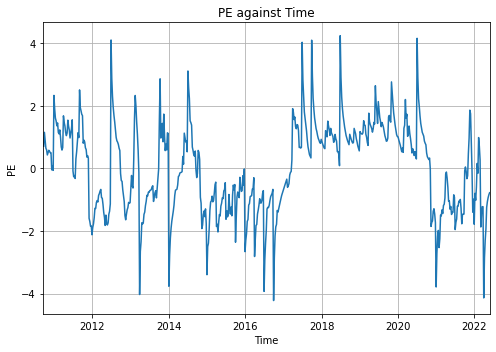

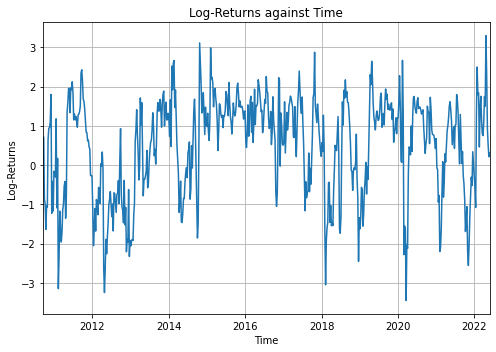

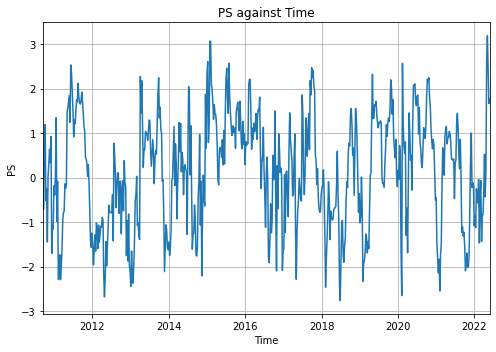

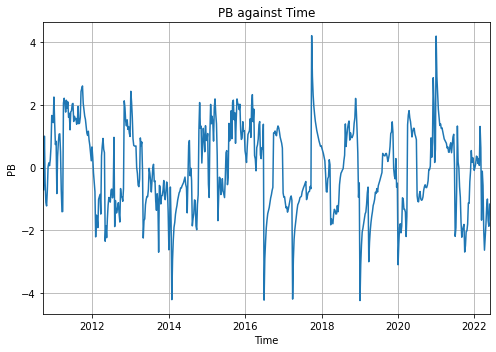

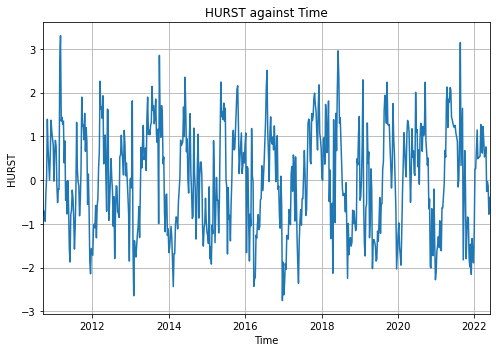

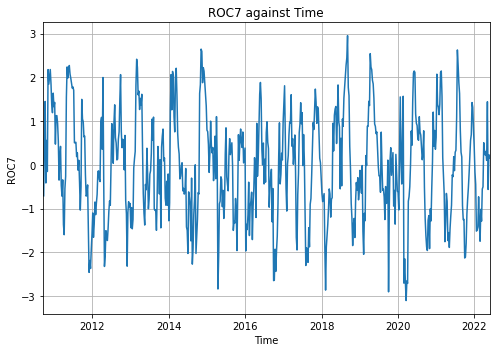

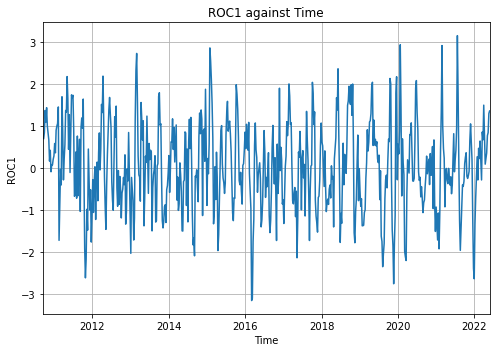

In [199]:
title_names = ['PE','Log-Returns', 'PS', 'PB', 'HURST', 'ROC7', 'ROC1']
for i in range(n_features) : 
    fig, ax = plt.subplots(1)
    # for n in range(n_stocks) :
    ax.plot(FR_index[201:],normalized_pc[:,3,i])
    # ax.scatter(FR_index[201:],normalized_pc[:,3,i])
    ax.set_xlim(date_min, date_max)
    ax.set_ylabel(f"{title_names[i]}")
    ax.set_xlabel(f"Time")
    ax.set_title(f"{title_names[i]} against Time")
    ax.grid(True)
    fig.set_size_inches(7,5)
    fig.tight_layout()
    fig.savefig(f'6-processed-data{title_names[i]}')  

## Storing values from dataframe into a dictionary

### We attempt to predict 'test_company's' cumulative log returns 2 weeks from now based on historical data which has a lookback period of 13 weeks.


In [200]:
# # import sys
# # import numpy as np 
# # np.set_printoptions(threshold=sys.maxsize)

# ft1 =  np.stack(FR_dic.values(), axis=2)
# ft2 = np.stack(TI_dic.values(), axis=2)
# feature_tensor = np.dstack((ft1, ft2))

# error_list = []
# for n in np.arange(1,150,2) : 
#     core, factors = tucker(feature_tensor, rank= [711,n,6])
#     pc = tl.tenalg.mode_dot(feature_tensor, factors[1].T, mode = 1)
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_tensor)/tl.norm(feature_tensor)
#     error_list.append(rec_error)
# fig, ax = plt.subplots(1)
# ax.plot(np.arange(1,150,2), error_list)
# ax.scatter(np.arange(1,150,2), error_list)
# ax.grid('On')
# ax.set_title("Reconstruction error against number of companies")
# ax.set_xlabel("Rank")
# ax.set_ylabel("Reconstruction error")



From the figure above, the reconstruction error decreases drastically initially once the rank increases above 13, the error no longer drastically anymore. We will hence select a rank of [700,18,6]

## Generate our target labels

1) Predict whether the stock will go +1 or -1 in the next 2 weeks.



In [201]:
def get_solo_features(solo_df, lb_duration, lf_duration, loading_len) :
    list_of_solo_f = []
    #SOLO FEATURES
    for i in range(0,len(solo_df)-lb_duration-lf_duration+1) : 
        list_of_solo_f.append(solo_df[i:i+lb_duration].to_numpy())
    return list_of_solo_f[loading_len:]

In [202]:
# print(len(normalized_pc))


In [203]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(FR_dic['PE'].columns[1:20])
    # print(FR_dic['PE'].columns[20:40])
    # print(FR_dic['PE'].columns[40:60])
    # print(FR_dic['PE'].columns[60:80])
    print(FR_dic['PE'].columns[80:110])
    # print(FR_dic['PE'].columns[110:200])
    print(FR_dic['PE'].columns[120:147])
    print(FR_dic['PE'].columns[180:220])








Index(['COKE US Equity', 'WDFC US Equity', 'AAPL US Equity', 'KLAC US Equity',
       'SEIC US Equity', 'CSPI US Equity', 'ALOT US Equity', 'AMGN US Equity',
       'CAMP US Equity', 'HCSG US Equity', 'PAYX US Equity', 'LRCX US Equity',
       'MGRC US Equity', 'JKHY US Equity', 'LYTS US Equity', 'ROST US Equity',
       'ADBE US Equity', 'AMWD US Equity', 'ASTE US Equity'],
      dtype='object')
Index(['MCRI US Equity', 'NATH US Equity', 'ORLY US Equity', 'PTEN US Equity',
       'PZZA US Equity', 'RCKY US Equity', 'REG US Equity', 'ROCK US Equity',
       'SANM US Equity', 'SCHN US Equity', 'SCVL US Equity', 'SHOO US Equity',
       'UEIC US Equity', 'UFPI US Equity', 'UFPT US Equity', 'URBN US Equity',
       'ABCB US Equity', 'ADTN US Equity', 'CPRT US Equity', 'DAKT US Equity',
       'FLEX US Equity', 'MATW US Equity', 'MIND US Equity', 'NNBR US Equity',
       'PENN US Equity', 'SGMA US Equity', 'SSYS US Equity', 'TESS US Equity',
       'USAP US Equity', 'VECO US Equity'],
    

### GET THE RETURNS OF COMPANY X

In [204]:
#Append the training data of test company 
def get_solo_df_and_y_predict() : 
    solo_df = pd.DataFrame()
    test_company = 'WFC'
    k = 0
    for key,value in FR_dic.items() : 
        if k == 0 : 
            solo_df[key] = value[f'{test_company} US Equity']

    for key,value in TI_dic.items() : 
        solo_df[key] = value[f'{test_company} US Equity']

    for col in FR_dic['PE'] : 
        if col.startswith(test_company) : 
            y_predict = log_ret[col]

    return solo_df,y_predict

solo_df,y_predict = get_solo_df_and_y_predict()
test_comp_returns = pd.DataFrame(y_predict).set_axis(['Log Returns'], axis = 1)
test_comp_returns['Cumulative Log Returns'] = test_comp_returns['Log Returns'].cumsum()

def get_n_week_returns(log_ret, look_back_duration, lookforward, loading_len) : 
    sdate = test_comp_returns.index.values[0]
    edate = test_comp_returns.index.values[-1]
    # print(log_ret)
    s = (log_ret
     .reset_index()
     .iloc[look_back_duration:]
    )

    n_week_returns = s.rolling(lookforward).sum()
    n_week_returns.index = list(pd.date_range(sdate ,edate + pd.to_timedelta(2, unit='D') ,freq='w') - pd.to_timedelta(2, unit='D'))[:-look_back_duration]
    n_week_returns = n_week_returns.dropna() 
    print(n_week_returns)
    return n_week_returns[loading_len:]

def to_simple_return(cum_log_ret) : 
    return np.exp(cum_log_ret) - 1

    


In [205]:
y_arr =  get_n_week_returns(test_comp_returns['Log Returns'], look_back_duration, look_forward, loading_len)

            Log Returns
2006-11-24        -0.34
2006-12-01         0.20
2006-12-08         0.22
2006-12-15         0.19
2006-12-22        -0.28
...                 ...
2022-04-22        -2.71
2022-04-29         0.92
2022-05-06        -1.91
2022-05-13        -0.97
2022-05-20         4.22

[809 rows x 1 columns]


In [206]:
print(len(y_arr))

609


In [207]:
from numpy import newaxis
# x_ret_list contains the 
y_arr =  get_n_week_returns(test_comp_returns['Log Returns'], look_back_duration, look_forward, loading_len)
y_arr[(y_arr > 0)] = 1
y_arr[y_arr <= 0] = -1

datedex = y_arr.index

y_ret = y_arr.to_numpy().flatten()


print(len(y_ret))
# y_test = np.random.rand(620)
# y_test[(y_test > 0.5)] = 1

# y_test[y_test <= 0.5] = -1
# y_ret = y_test

list_of_solo_f = get_solo_features(solo_df, look_back_duration, look_forward,loading_len)
list_of_solo_f = list_of_solo_f[1:]
list_of_combined_features = []


for feature_t,solo_feature in zip(list_of_features,list_of_solo_f)  :
    solo_feature = solo_feature[:,newaxis,:]
    # print(feature_t.shape)
    # print(solo_feature.shape)


    tmp = np.concatenate((feature_t,solo_feature), axis=1)
    list_of_combined_features.append(tmp)


X_Cols = [tensor.flatten() for tensor in list_of_features ]
print(len(X_Cols))
S_Cols = [mat.flatten() for mat in list_of_solo_f]

C_Cols = [tensor.flatten() for tensor in list_of_combined_features]



# C_val, Y_val = C_Cols[-120:], y_ret[-120:]

# S_val = S_Cols[-120:]

X_Cols, S_Cols, C_Cols = X_Cols[:-120], S_Cols[:-120] , C_Cols[:-120]





# print(datedex[-120:])
# X_train

            Log Returns
2006-11-24        -0.34
2006-12-01         0.20
2006-12-08         0.22
2006-12-15         0.19
2006-12-22        -0.28
...                 ...
2022-04-22        -2.71
2022-04-29         0.92
2022-05-06        -1.91
2022-05-13        -0.97
2022-05-20         4.22

[809 rows x 1 columns]
609
609


In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from numpy import newaxis


y_ori = y_ret[:-120]


X_train, X_test, Y_train, Y_test = train_test_split(X_Cols, y_ori, random_state = 42, shuffle=False)

S_train, S_test, Y_train, Y_test = train_test_split(S_Cols, y_ori, random_state = 42, shuffle=False)

C_train, C_test, Y_train, Y_test = train_test_split(C_Cols, y_ori, random_state = 42, shuffle=False)


In [209]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, classification_report



In [210]:
# ## HYPERPARAMETER TUNING
n_estimators = [1000,2000]

max_features = ['sqrt']

max_depth = [3,4,5]

min_samples_split = [3]

min_samples_leaf = [3]

bootstrap = [True]


random_grid = {
    
'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap' : bootstrap

}

rf = RandomForestClassifier()

# Using 5 fold cross validation
# Search across 100 different combintations and use all available cores

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions= random_grid,
    n_iter = 100, 
    verbose= 4,
    cv = 5,
    random_state= 144,
    n_jobs = 8,
    
)

rf_random.fit(C_train, Y_train)


c:\Users\zackx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=8,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [3],
                                        'n_estimators': [1000, 2000]},
                   random_state=144, verbose=4)

In [211]:
def baseline(Y_test, prediction) : 
    Y_test = Y_test.flatten()

    all_ones = np.ones(len(Y_test))
    all_neg_ones = np.ones(len(Y_test))* -1
    pos_neg = np.repeat([1,-1], len(Y_test))[:len(Y_test)]
    pos_pos_neg = np.repeat([1,1,-1], len(Y_test)/2)[:len(Y_test)]
    neg_neg_pos = np.repeat([-1,-1,1], len(Y_test)/2)[:len(Y_test)]

    print(f"Actual number of ones : {np.count_nonzero(Y_test == 1)}")
    print(f"Predicted number of ones : {np.count_nonzero(prediction == 1)}")
    print(f"Baseline if all were ones : {np.count_nonzero((all_ones==Y_test)) / len(Y_test)}")

    print(f"Actual number of -1 : {np.count_nonzero(Y_test == -1)}")
    print(f"Predicted number of -1 : {np.count_nonzero(prediction == -1)}")
    print(f"Baseline if all were -1 : {np.count_nonzero((all_neg_ones==Y_test)) / len(Y_test)}")
    print()
    print(f"Baseline if all were 1-1 : {np.count_nonzero((pos_neg==Y_test)) / len(Y_test)}")
    print(f"Baseline if all were 11-1 : {np.count_nonzero((pos_pos_neg==Y_test)) / len(Y_test)}")
    print(f"Baseline if all were -1-11 : {np.count_nonzero((neg_neg_pos==Y_test)) / len(Y_test)}")




In [212]:
rand_frst_S = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf=2,  max_features='auto', max_depth = 3, bootstrap = False, random_state = 2)
rand_frst_S.fit(S_train,Y_train)


prediction = rand_frst_S.predict(S_train)
print(accuracy_score(Y_train, prediction))
print(confusion_matrix(Y_train, prediction))

prediction = rand_frst_S.predict(S_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))


print(classification_report(Y_test,prediction))
# prediction2 = rand_frst_S.predict(C_val)
# print(accuracy_score(Y_val, prediction2))
# print(confusion_matrix(Y_val, prediction2))

baseline(Y_test,prediction)


c:\Users\zackx\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6229508196721312
[[ 55 119]
 [ 19 173]]
0.5284552845528455
[[31 30]
 [28 34]]
              precision    recall  f1-score   support

        -1.0       0.53      0.51      0.52        61
         1.0       0.53      0.55      0.54        62

    accuracy                           0.53       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.53      0.53      0.53       123

Actual number of ones : 62
Predicted number of ones : 64
Baseline if all were ones : 0.5040650406504065
Actual number of -1 : 61
Predicted number of -1 : 59
Baseline if all were -1 : 0.4959349593495935

Baseline if all were 1-1 : 0.5040650406504065
Baseline if all were 11-1 : 0.4959349593495935
Baseline if all were -1-11 : 0.5040650406504065


In [213]:
rand_frst_C = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf=2,  max_features='sqrt', max_depth = 3, bootstrap = False, random_state = 2)

rand_frst_C.fit(C_train,Y_train)


prediction = rand_frst_C.predict(C_train)
print(accuracy_score(Y_train, prediction))
print(confusion_matrix(Y_train, prediction))

prediction = rand_frst_C.predict(C_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

print(classification_report(Y_test,prediction))


# prediction2 = rand_frst_S.predict(C_val)
# print(accuracy_score(Y_val, prediction2))
# print(confusion_matrix(Y_val, prediction2))

baseline(Y_test,prediction)





0.8060109289617486
[[109  65]
 [  6 186]]
0.5121951219512195
[[27 34]
 [26 36]]
              precision    recall  f1-score   support

        -1.0       0.51      0.44      0.47        61
         1.0       0.51      0.58      0.55        62

    accuracy                           0.51       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.51      0.51      0.51       123

Actual number of ones : 62
Predicted number of ones : 70
Baseline if all were ones : 0.5040650406504065
Actual number of -1 : 61
Predicted number of -1 : 53
Baseline if all were -1 : 0.4959349593495935

Baseline if all were 1-1 : 0.5040650406504065
Baseline if all were 11-1 : 0.4959349593495935
Baseline if all were -1-11 : 0.5040650406504065


In [214]:
rand_frst_X = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf=2,  max_features='sqrt', max_depth = 7, bootstrap = False, random_state = 2)

rand_frst_X.fit(X_train,Y_train)


prediction = rand_frst_X.predict(X_train)
print(accuracy_score(Y_train, prediction))
print(confusion_matrix(Y_train, prediction))

prediction = rand_frst_X.predict(X_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

print(classification_report(Y_test,prediction))

# prediction2 = rand_frst_S.predict(C_val)
# print(accuracy_score(Y_val, prediction2))
# print(confusion_matrix(Y_val, prediction2))

baseline(Y_test,prediction)

1.0
[[174   0]
 [  0 192]]
0.5365853658536586
[[21 40]
 [17 45]]
              precision    recall  f1-score   support

        -1.0       0.55      0.34      0.42        61
         1.0       0.53      0.73      0.61        62

    accuracy                           0.54       123
   macro avg       0.54      0.54      0.52       123
weighted avg       0.54      0.54      0.52       123

Actual number of ones : 62
Predicted number of ones : 85
Baseline if all were ones : 0.5040650406504065
Actual number of -1 : 61
Predicted number of -1 : 38
Baseline if all were -1 : 0.4959349593495935

Baseline if all were 1-1 : 0.5040650406504065
Baseline if all were 11-1 : 0.4959349593495935
Baseline if all were -1-11 : 0.5040650406504065


In [215]:
print('Random grid: ', random_grid, '\n')

print('Best Parameters: ', rf_random.best_params_, ' \n')

# print(rf_random.best_score_)
print(rf_random.best_params_)
target_names = ['Red', 'Green']
prediction = rf_random.predict(C_train)
print(accuracy_score(Y_train, prediction))
# print(classification_report(Y_train, prediction, target_names=target_names))
print(confusion_matrix(Y_train, prediction))


prediction = rf_random.predict(C_test)
print(accuracy_score(Y_test, prediction))
print(classification_report(Y_test, prediction, target_names=target_names))
print(confusion_matrix(Y_test, prediction))


# prediction_val1= rf_random.predict(C_val)
# print(accuracy_score(Y_val, prediction_val1))
# print(confusion_matrix(Y_val, prediction_val1))

Random grid:  {'n_estimators': [1000, 2000], 'max_features': ['sqrt'], 'max_depth': [3, 4, 5], 'min_samples_split': [3], 'min_samples_leaf': [3], 'bootstrap': [True]} 

Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}  

{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
0.8060109289617486
[[112  62]
 [  9 183]]
0.5040650406504065
              precision    recall  f1-score   support

         Red       0.50      0.34      0.41        61
       Green       0.51      0.66      0.57        62

    accuracy                           0.50       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.50      0.50      0.49       123

[[21 40]
 [21 41]]


In [216]:
feature_imp = pd.Series(rf_random.best_estimator_.feature_importances_)
# feature_imp = pd.Series(rand_frst_X.feature_importances_)

feature_imp = feature_imp.sort_values(ascending=False)
srted_indx_list = feature_imp.index.to_list()

col_names= ['PE', 'PX_LAST', 'PS', 'PB', 'HURST', 'MOM', 'ROC']
# col_names = ['BB_PERCENT', 'HURST', 'MOM', 'ROC','RSI','WLPR']

def get_feature_name (srted_indx_list) :
    name_list = []
    for num in srted_indx_list : 
        # half = len(srted_indx_list)/2 
        rows = num // n_features
        cols = num % n_features

        name = f'{col_names[cols]}.{rows+1}' 

        name_list.append(name)
    
    return name_list


# feature_imp.index = (get_feature_name(srted_indx_list) )









In [217]:
indices = feature_imp[:15].index





# X_train, X_test, Y_train, Y_test = train_test_split(X_Cols, y_ori, random_state = 42, shuffle=False)

# S_train, S_test, Y_train, Y_test = train_test_split(S_Cols, y_ori, random_state = 42, shuffle=False)

# C_train, C_test, Y_train, Y_test = train_test_split(C_Cols, y_ori, random_state = 42, shuffle=False)

C_Cols2 = []
for C in C_Cols : 
    C_Cols2.append([C[i] for i in indices])

C_train2, C_test2, Y_train, Y_test = train_test_split(C_Cols2, y_ori, random_state = 42, shuffle=False)



n_estimators = [1000]

max_features = ['sqrt']

max_depth = [2,3,4,5]

min_samples_split = [2]

min_samples_leaf = [2]

bootstrap = [True,False]


random_grid = {
    
'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap' : bootstrap

}

rf = RandomForestClassifier()

# Using 5 fold cross validation
# Search across 100 different combintations and use all available cores

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions= random_grid,
    n_iter = 100, 
    verbose= 4,
    cv = 5,
    random_state= 144,
    n_jobs = 8,
    
)

rf_random.fit(C_train2, Y_train)



c:\Users\zackx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [2],
                                        'n_estimators': [1000]},
                   random_state=144, verbose=4)

In [218]:
print('Random grid: ', random_grid, '\n')

print('Best Parameters: ', rf_random.best_params_, ' \n')

# print(rf_random.best_score_)
print(rf_random.best_params_)
target_names = ['Red', 'Green']
prediction = rf_random.predict(C_train2)
print(accuracy_score(Y_train, prediction))
# print(classification_report(Y_train, prediction, target_names=target_names))
print(confusion_matrix(Y_train, prediction))


prediction = rf_random.predict(C_test2)
print(accuracy_score(Y_test, prediction))
print(classification_report(Y_test, prediction, target_names=target_names))
print(confusion_matrix(Y_test, prediction))


# prediction_val1= rf_random.predict(C_val)
# print(accuracy_score(Y_val, prediction_val1))
# print(confusion_matrix(Y_val, prediction_val1))

Random grid:  {'n_estimators': [1000], 'max_features': ['sqrt'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}  

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}
0.819672131147541
[[120  54]
 [ 12 180]]
0.4878048780487805
              precision    recall  f1-score   support

         Red       0.48      0.48      0.48        61
       Green       0.49      0.50      0.50        62

    accuracy                           0.49       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.49      0.49      0.49       123

[[29 32]
 [31 31]]


In [219]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(feature_imp.sort_values(ascending=False))

# import seaborn as sns 
# f, ax = plt.subplots(figsize=(20, 15))
# ax = sns.barplot(x=feature_imp.sort_values(ascending=False), y=feature_imp.sort_values(ascending=False).index, data=df)
# ax.set_title("Visualize feature scores of the features")
# # ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()
# f.savefig('feature_scores')

In [220]:



# baseline(Y)

In [221]:
# # FR_dic['PE']['AAPL US Equity'].rolling(50).mean().plot()
# # FR_dic['PE']['SLB US Equity'].rolling(50).mean().plot()
# aapl_acf = acf(FR_dic['PE']['AAPL US Equity'])
# aapl_acf_2 = acf(FR_dic['PX_LAST']['AAPL US Equity.1'])
# aapl_acf_3 = acf(FR_dic['PS']['AAPL US Equity.2'])
# aapl_acf_4 = acf(FR_dic['PB']['AAPL US Equity.3'])
# aapl_acf_5 = acf(TI_dic['HURST']['AAPL US Equity'])
# aapl_acf_6 = acf(TI_dic['HURST']['AAPL US Equity'])

# # aapl_acf_6 = acf(FR_dic['PB']['AAPL US Equity.3'])


# test_df = pd.DataFrame([aapl_acf, aapl_acf_2, aapl_acf_3, aapl_acf_4, aapl_acf_5, aapl_acf_6]).T
# test_df.columns = ['ACF of first-order difference of PE of AAPL', 'ACF of first-order difference of PX_LAST of AAPL', 
#                    'ACF of first-order difference of PS of AAPL', 'ACF of first-order difference of PB of AAPL', 'ACF of first-order difference of HURST of AAPL',
#                    'ACF of first-order difference of Momentum of AAPL'
#                   ] 
# test_df.index += 1
# test_df.plot(kind='bar', figsize=(10,7))

# plt.savefig('ACF.png')